Sodelujoči

    Tomaž Štrus
    Anže Košir
    Jan Harej

O projektu: Iz platforme Steam, namenjenu predvsem za distrubicijo video iger, bomo zbrali podatke igrah več ljudi, ter analizirali stvari kot so npr. koliko iger, ki jih kupijo dejansko preigrajo, kolika časa bo nekdo zapravil za neko igro, kakšno igro bo kupil naslednjo, glede na svoje igre ipd.

Podatki: Uporabili bomo API, ki ga ponuja Steam: https://developer.valvesoftware.com/wiki/Steam_Web_API#JSON Tu lahko dobimo podatko o čisto vsemu kar potrebujemo npr. o uporabniku, njegove igre, prijatelji, koliko ur je igral neko igro, ... Dobili bomo podatke za npr. 100.000+ uporabnikov (prijatelji naših prijateljev, in njihov prijateljev itd.)

## Vprašanja za raziskavo
1. Povprečno dokončanje igre
2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili
3. Najmanjkrat odklenjeni dosežki za igrane igre
4. Število prijateljev glede na "starost" računa

In [1]:
#install libraries on windows
"""
!python -m pip install numpy
!python -m pip install matplotlib
!python -m pip install requests
"""

'\n!python -m pip install numpy\n!python -m pip install matplotlib\n!python -m pip install requests\n'

In [2]:
import requests
import json
import numpy
import datetime
import matplotlib.pyplot as plt
import os
from inspect import getouterframes, currentframe

In [11]:
api_key = "5F5DD2FA8A6C8646FCFE265C07BB90E5"
global_player_ids = set()
players_summaries = dict()
player_friends = dict()
my_id="76561198101569818"

In [4]:
def get_player_summary (id):
    try:
        data = requests.get( "http://api.steampowered.com/ISteamUser/GetPlayerSummaries/v0002/?key="+api_key+"&steamids="+id).json()
    except:
        return None
    return data["response"]["players"][0]
    
def get_multiple_player_summary (ids):
    request_str = "http://api.steampowered.com/ISteamUser/GetPlayerSummaries/v0002/?key="+api_key+"&steamids="
    request_str += ",".join(ids)

    try:
        data = requests.get(request_str).json()
    except:
        return None
    return data["response"]["players"]
    

In [5]:
def get_player_friends(id):
    try:
        data = requests.get( "http://api.steampowered.com/ISteamUser/GetFriendList/v0001/?key=" + api_key + "&steamid=" + str(id) + "&relationship=friend").json()["friendslist"]["friends"]
    except KeyError:
        return []
    return data

In [26]:
get_player_summary(my_id)

{'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be.jpg',
 'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be_full.jpg',
 'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/7f/7f1e73c6f77919cc80e8c9410e347da0e06336be_medium.jpg',
 'communityvisibilitystate': 3,
 'lastlogoff': 1523602872,
 'personaname': 'Leo Alioth',
 'personastate': 1,
 'personastateflags': 0,
 'primaryclanid': '103582791434796278',
 'profilestate': 1,
 'profileurl': 'https://steamcommunity.com/id/pg97/',
 'realname': 'Anže',
 'steamid': '76561198101569818',
 'timecreated': 1375693680}

In [7]:
def fill_player_ids_rec(id, num = 1000, already_called = set()):
    global global_player_ids
    already_called.add(id)
    print("recursive call of id: " + id + "  len: " + str(len(global_player_ids)))
    try:
        if get_player_summary(id)["profilestate"] != 1:
            #print("not public")
            return None
    except KeyError:
        #print("not public key error")
        return None
    data = get_player_friends(id)
    tmp_id = set()
    for friend in data:
        if len(global_player_ids) >= num:
            print("enough friends")
            break
        tmp_id.add(friend["steamid"])
        global_player_ids.add(friend["steamid"])
        #print("len: "+ str(len(global_player_ids)))
        
    print("added my friends" + "  len: " + str(len(global_player_ids)))
    
    for playerid in tmp_id:
        if len(global_player_ids) >= num:
            break
        data = get_player_friends(playerid)
        for fof in data:
            if len(global_player_ids) >= num:
                print("enough friends")
                break
            global_player_ids.add(fof["steamid"])
        #print("added friends of friend")
            
    print("added friends of friends" + "  len: " + str(len(global_player_ids)))
    
    for playerid in tmp_id:
        if len(global_player_ids) >= num:
            print("enough friends")
            break
        if playerid not in already_called:
            fill_player_ids_rec(playerid, num, already_called)
    
    

In [8]:
def fill_players_summaries():
    global global_player_ids
    global players_summaries
    
    player_ids = list(global_player_ids)
    for i in range(0, len(player_ids)+1, 100):
        tmp_summaries = get_multiple_player_summary(player_ids[i-100:i])
        for summary in tmp_summaries:
            #summary["friends"] = get_player_friends(summary["steamid"])
            players_summaries[summary["steamid"]] = summary
        

In [20]:
def fill_players_friends():
    global player_friends
    global players_summaries
    for player in players_summaries.keys():
        player_friends[player] = get_player_friends(player)
        print(len(player_friends))
    print("done")

In [21]:
fill_players_friends()

57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275

ConnectionError: HTTPConnectionPool(host='api.steampowered.com', port=80): Max retries exceeded with url: /ISteamUser/GetFriendList/v0001/?key=5F5DD2FA8A6C8646FCFE265C07BB90E5&steamid=76561198263729449&relationship=friend (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x101C24F0>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond',))

In [23]:
#--------------- request player ids from api ------------------
#global_player_ids = set()
#fill_player_ids_rec(my_id, 10000)

#--------------- request player ids from file -----------------
#with open("pid_set.json", "r") as fp:
#    global_player_ids = set(json.load(fp))
    
#------------- request player summary from api ----------------
#players_summaries = dict()
#fill_players_summaries()

#------------- request player summary from file ---------------
#with open("player_friends.json", "r") as fp:
#    players_friends = json.load(fp)
    
#------------- request player friends from api ----------------
#player_friends = dict()
#fill_players_friends()

#------------- request player friends from file ---------------
#with open("player_summaries.json", "r") as fp:
#    players_friends = json.load(fp)



#----------------- write player ids to file -------------------
#with open("pid_set.json", "w") as fp:
#    json.dump(list(global_player_ids), fp)
    
#--------------- write player summary to file -----------------
#with open("player_summaries.json", "w") as fp:
#    json.dump(players_summaries, fp)

#--------------- write player friends to file -----------------
with open("player_friends.json", "w") as fp:
    json.dump(player_friends, fp)

# Odgovori na vprašanja

### 1. Povprečno dokončanje igre

### 2. Število in vrsta Bannov v povezavi z javnimi/privatnimi profili

### 3. Najmanjkrat odklenjeni dosežki za igrane igre

### 4. Število prijateljev glede na "starost" računa

Text(0,0.5,'starost računa (leta)')

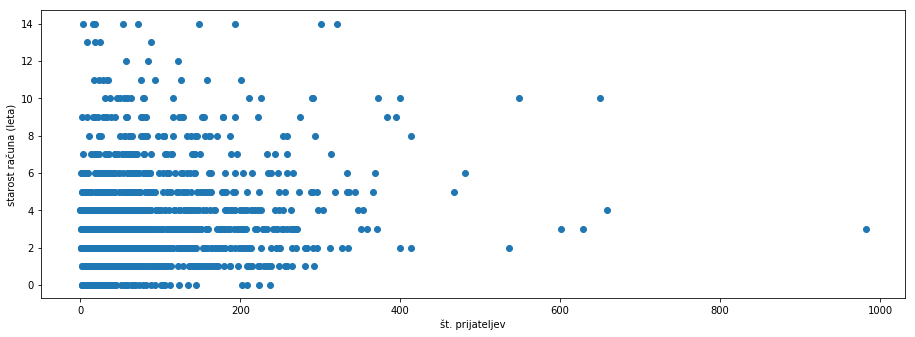

In [31]:
graph_x = []
graph_y = []
today = datetime.datetime.now()

for player_id in player_friends:
    try:
        time_created = datetime.datetime.fromtimestamp(int(players_summaries[player_id]["timecreated"]))
    except KeyError:
        continue
    
    years = today.year - time_created.year
    if today.month < time_created.month or (today.month == time_created.month and today.day < time_created.day):
        years -= 1
        
        
    last_log = players_summaries[player_id]["lastlogoff"]
    
    try:
        time_last_log = datetime.datetime.fromtimestamp(int(last_log))
    except KeyError:
        continue
    #if today.month - time_last_log.month <=3 and today.year - time_last_log.year <= 1:     
    graph_y += [years]
    graph_x += [len(player_friends[player_id])]



fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 1])
axes.scatter(graph_x, graph_y)
axes.set_xlabel('št. prijateljev')
axes.set_ylabel('starost računa (leta)')
#axes.set_title('Primerjava žanrov ter njihovih ocen');